In [77]:
import numpy as np
from keras import layers
from keras.layers import Input,Dense,Activation,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Model

import keras.backend as K
K.set_image_data_format('channels_last')

from keras.initializers import he_uniform

import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

In [107]:
def model(input_size):
    X_input=Input(input_size)
    
    X=Conv2D(16,(7,7),strides=(1,1),padding='same',kernel_initializer=he_uniform(seed=0))(X_input)
    X=BatchNormalization(axis=3)(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((3,3),strides=(1,1))(X)
    
    X=Conv2D(32,(3,3),strides=(1,1),padding='valid',kernel_initializer=he_uniform(seed=0))(X)
    X=BatchNormalization(axis=3)(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((3,3),strides=(1,1))(X)
    
    X=Conv2D(48,(5,5),strides=(1,1),padding='valid',kernel_initializer=he_uniform(seed=0))(X)
    X=BatchNormalization(axis=3)(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((3,3),strides=(1,1))(X)
    
    X=Conv2D(64,(3,3),strides=(1,1),padding='valid',kernel_initializer=he_uniform(seed=0))(X)
    X=BatchNormalization(axis=3)(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((3,3),strides=(1,1))(X)
    
    X=Flatten()(X)
    X=Dense(10,activation='softmax')(X)
    
    mod=Model(inputs=X_input,outputs=X)
    return mod

In [49]:
df=pd.read_csv('./datasets/fashion-mnist_train.csv')
train_data=df.as_matrix()
xtr=train_data[:,1::]
ytr=train_data[:,0].reshape(60000,1)
print(xtr.shape)
print(ytr.shape)
xtr=xtr.reshape(60000,28,28,1)
print(xtr.shape)
ytroh=tf.one_hot(ytr,10,axis=1)
with tf.Session() as sess:
    ytroh=sess.run(ytroh).reshape(60000,10)
print(ytroh.shape)

(60000, 784)
(60000, 1)
(60000, 28, 28, 1)
(60000, 10)


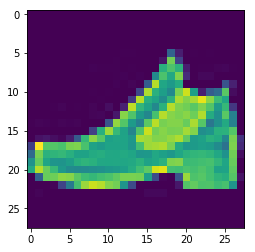

In [50]:
plt.imshow(xtr[1,:,:,:].reshape(28,28))

In [108]:
new_model=model(xtr.shape[1:])

In [109]:
new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [110]:
new_model.fit(xtr,ytroh,epochs=5,batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 74s 1ms/step - loss: 0.5328 - acc: 0.8187
Epoch 2/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3551 - acc: 0.8738
Epoch 3/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3163 - acc: 0.8873
Epoch 4/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2837 - acc: 0.8980
Epoch 5/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2633 - acc: 0.9055


In [111]:
df=pd.read_csv('./datasets/fashion-mnist_test.csv')
train_data=df.as_matrix()
xts=train_data[:,1::]
yts=train_data[:,0].reshape(10000,1)
print('xts:'+str(xts.shape))
print('yts:'+str(yts.shape))
xts=xts.reshape(10000,28,28,1)
ytsoh=tf.one_hot(yts,10,axis=1)
with tf.Session() as sess:
    ytsoh=sess.run(ytsoh).reshape(10000,10)
print('xts:'+str(xts.shape))
print('ytsoh:'+str(ytsoh.shape))

xts:(10000, 784)
yts:(10000, 1)
xts:(10000, 28, 28, 1)
yts:(10000, 10)


In [113]:
new_model.evaluate(xts,ytsoh)

10000/10000 [==============================] - 5s 533us/step


[0.2703128897309303, 0.9044]